In [7]:
%matplotlib inline

In [8]:
from sympy.stats import Normal, density, DiscreteUniform, P, sample, Die, Coin, given, E
from sympy import Symbol, pprint, symbols, Symbol, Eq, lambdify, init_printing, simplify
init_printing() 

In [9]:
from ipywidgets import interact, IntSlider, FloatSlider
import matplotlib.pyplot as plt
import numpy as np

# Additionnal Notes

## Section 1.3 Bayesian inference

(Page 6) The *geometric mean* is presented in a way I never saw before, $(\prod_{i=1}^N{\theta_i})^{\frac{1}{N}}=exp(E[log(\theta)])$. Here's the equation break down:<br><br>
$$exp\left(E[log(\theta)]\right)=exp\left(\sum{log(\theta)p(\theta)}\right)\\
=\prod{exp\left(log(\theta)p(\theta)\right)}=\prod{\left(exp(log(\theta))\right)^{p(\theta)}}\\
=\prod{\theta^{p(\theta)}}=\left(\prod{\theta}\right)^{p(\theta)}$$
This is good for a weighted. If $p(\theta)=\frac{1}{N}$ then we found the usual suspect $\left(\prod{\theta}\right)^{\frac{1}{N}}$

I didn't know about *coefficient of variation* and *geometric standard deviation*, so I didn't bother to do the math.

## Section 1.4 Discrete probability examples: genetics and spell checking

(page 9) It was not obvious to me how the posterior probability was calculated for the third son
$$Pr(\theta=1|y_1,y_2,y_3)=\frac{(0.5)(0.2)}{(0.5)(0.2)+(1)(0.8)}$$

Best thing to do in that case is to go back to the basics
$$Pr(\theta=1|y_1,y_2,y_3)=\frac{Pr(\theta=1,y_1,y_2,y_3)}{Pr(y_1,y_2,y_3)}\\
=\frac{Pr(\theta=1,y_1,y_2,y_3)}{Pr(y_1,y_2,y_3)}$$

Let's work on the numerator first <br>
$Pr(\theta=1,y_1,y_2,y_3)$<br>
$=Pr(y_3|\theta=1,y_1,y_2)Pr(\theta=1,y_1,y_2)$<br>
$=Pr(y_3|\theta=1)Pr(\theta=1,y_1,y_2)$ *because of the conditional independance on $\theta$*<br>
$=Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)Pr(y_1,y_2)$ *simple Bayes rule*

Denominator
$Pr(y_1,y_2,y_3)$<br>
$=Pr(y_1,y_2,y_3,\theta=0)+Pr(y_1,y_2,y_3,\theta=1)$<br>
$=Pr(y_3|\theta=0,y_1,y_2)Pr(\theta=0,y_1,y_2)+Pr(y_3|\theta=1,y_1,y_2)Pr(\theta=1,y_1,y_2)$<br>
$=Pr(y_3|\theta=0)Pr(\theta=0|y_1,y_2)Pr(y_1,y_2)+Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)Pr(y_1,y_2)$ *same as above*<br>

Put everything together<br>
$\frac{Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)Pr(y_1,y_2)}{Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)Pr(y_1,y_2)+Pr(y_3|\theta=0)Pr(\theta=0|y_1,y_2)Pr(y_1,y_2)}$<br>
$=\frac{Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)}{Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)+Pr(y_3|\theta=0)Pr(\theta=0|y_1,y_2)}$<br>
$=\frac{(0.5)(0.2)}{(0.5)(0.2)+(1)(0.8)}$

# Exercices

<dl>
    <dt>1</dt>
    <dd>Conditional probability: suppose that if $\theta=1$, then *y* has a normal distribution with mean 1 and standard deviation $\sigma$, and if $\theta=2$, then *y* has a normal distribution with mean 2 and standard deviation $\sigma$. Also, suppose $Pr(\theta=1)=0.5$ and $Pr(\theta=2)=0.5$
    </dd>
</dl>

In [10]:
sigma = Symbol("sigma", positive=True)
mu = DiscreteUniform('mu', [1,2])
N = Normal('normal', mu, sigma)

<dl>
    <dt>1a</dt>
    <dd>For $\sigma=2$, write the formula for the marginal probability density for *y* and sketch it
    </dd>
</dl>

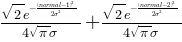

In [11]:
marginal = sum(P(Eq(mu,i))*given(N, Eq(mu,i)).pspace.pdf for i in [1,2])
marginal

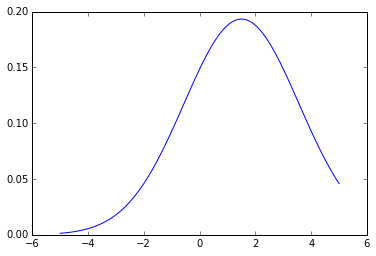

In [12]:
X = np.linspace(-5,5,100)
f = lambdify(N, marginal.subs(sigma, 2), "numpy")
plt.plot(X, f(X))

<dl>
    <dt>1b</dt>
    <dd>What is $Pr(\theta=1|y=1)$, again supposing $\sigma=2$?
    </dd>
</dl>

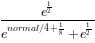

In [13]:
sampling_dist = given(N, Eq(mu,1)).pspace.pdf
prior = P(Eq(mu,1))
post = prior * sampling_dist / marginal
simplify(post.subs(sigma, 2))

<dl>
    <dt>1c</dt>
    <dd>Describe how the posterior density of $\theta$ changes in shape as $\sigma$ is increased and is it is decreased.
    </dd>
</dl>

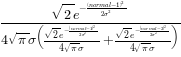

In [17]:
post

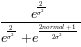

In [18]:
simplify(post)

Might as well plot it as a function of $\sigma$

[              nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               nan               nan
               nan               nan               

/Users/alexis/anaconda3/lib/python3.4/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in true_divide
  """


None

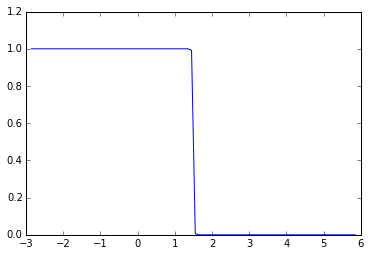

In [27]:
@interact(sig = FloatSlider(min=0.1, max=600, value=2))
def plot(sig=1):
    X = np.linspace(-50,50,1000)
    f = lambdify(N, post.subs(sigma, sig), "numpy")
    print(f(X))
    plt.plot(X, f(X))